# QIIME 2 Workflow for OGT paper:
Adapted from Vanja's Qiime2_Workflow_MicrobialMatt_August2020 python notebook that was further adapted from Langille Lab and qiime tutorials

## Workflow for Phylogentic Tree and Core Diversity Metrics

### Includes section for making figures for the paper


In [7]:
'''Activate qiime env'''
# conda activate qiime2-2020.6 prior to opening jupyter notebook

!qiime --version

q2cli version 2020.6.0
Run `qiime info` for more version details.


In [1]:
'''Set metadata variable'''

METADATA = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected.txt"

METADATA_downstream = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream.txt"


In [2]:
'''Load libraries for figure creation'''
import pandas as pd
import numpy as np

import seaborn as sns

# sns.set(style="ticks")
# import matplotlib as matplotlib
import matplotlib.pyplot as plt

import matplotlib.colorbar
import matplotlib.colors
import matplotlib.cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline


____

## Generate a tree for phylogenetic diversity analyses

In [29]:
'''Build phylogentic tree using fasttree and mafft alignment \
for downstream analyses related to diversity'''

!qiime phylogeny align-to-tree-mafft-fasttree \
  --i-sequences DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs.qza \
  --o-alignment DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-aligned-rep-seqs.qza \
  --o-masked-alignment DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-masked-aligned-rep-seqs.qza \
  --o-tree DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-unrooted-tree.qza \
  --o-rooted-tree DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree.qza



Saved FeatureData[AlignedSequence] to: DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-aligned-rep-seqs.qza
Saved FeatureData[AlignedSequence] to: DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-masked-aligned-rep-seqs.qza
Saved Phylogeny[Unrooted] to: DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-unrooted-tree.qza
Saved Phylogeny[Rooted] to: DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree.qza


## Generate Alpha and Beta diversity metrics

The metrics computed by default are from the core-metrics-phylogentic command:

#### Alpha diversity
- Shannon’s diversity index (a quantitative measure of community richness)
- Observed Features (a qualitative measure of community richness)
- Faith’s Phylogenetic Diversity (a qualitiative measure of community richness that incorporates phylogenetic relationships between the features)
- Evenness (or Pielou’s Evenness; a measure of community evenness)

#### Beta diversity
- Jaccard distance (a qualitative measure of community dissimilarity)
- Bray-Curtis distance (a quantitative measure of community dissimilarity)
- unweighted UniFrac distance (a qualitative measure of community dissimilarity that incorporates phylogenetic relationships between the features)
- weighted UniFrac distance (a quantitative measure of community dissimilarity that incorporates phylogenetic relationships between the features)



In [34]:
'''Get core metrics for diversity analysis'''

!qiime diversity core-metrics-phylogenetic \
  --i-phylogeny DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree.qza \
  --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
  --p-sampling-depth 13328 \
  --m-metadata-file mappingfile_NileshMehta_with_Metadata_062715_corrected.txt \
  --output-dir DADA2_full/tree_outdir/diversity/core-metrics-results

Saved FeatureTable[Frequency] to: DADA2_full/tree_outdir/diversity/core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: DADA2_full/tree_outdir/diversity/core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: DADA2_full/tree_outdir/diversity/core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: DADA2_full/tree_outdir/diversity/core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: DADA2_full/tree_outdir/diversity/core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: DADA2_full/tree_outdir/diversity/core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: DADA2_full/tree_outdir/diversity/core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: DADA2_full/tree_outdir/diversity/core-metrics-results/bray_curtis_distance_

### Examine Alpha Diversity

#### Generate Alpha rarefaction curves

Given the number of paired reads per sample is at a minimum in sample 004.T1 at a depth of 13328. We will not rarefiy since 13328 is of high enough sampling depth. 


In [68]:
'''Update metadata file for alpha diversity exploration'''

#Load and modify in pandas
md_alpha = pd.read_table(METADATA_downstream)
# Create new column that specifies antibiotic treatment for Ancef,
# samples from patient 9 (inclusive of none), and all other ab treatments (inclusive of none)
md_alpha['AB_expl'] = md_alpha.apply(lambda row: "Patient 9"\
             if row['subjectID']==9 else ('Ancef' if row["AB"]=="Ancef" \
            else "Other"), axis=1)

md_alpha.head()
md_alpha.to_csv("md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-alpha.txt",
               sep='\t', index=False)

METADATA_downstream_alpha = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-alpha.txt"


In [9]:
'''Get alpha rarefaction plots'''

# !mkdir DADA2_full/tree_outdir/diversity
# !mkdir DADA2_full/tree_outdir/diversity/alpha_rarefaction

# !rm DADA2_full/tree_outdir/diversity/alpha_rarefaction/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree-alpha-rarefaction-max13099.qzv

!qiime diversity alpha-rarefaction \
  --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
  --i-phylogeny DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree.qza \
  --p-max-depth 13099 \
  --m-metadata-file $METADATA_downstream_alpha \
  --o-visualization DADA2_full/tree_outdir/diversity/alpha_rarefaction/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree-alpha-rarefaction-max13099.qzv

!qiime diversity alpha-rarefaction \
  --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
  --i-phylogeny DADA2_full/tree_outdir/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree.qza \
  --p-max-depth 171745 \
  --p-min-depth 13099 \
  --m-metadata-file $METADATA_downstream_alpha \
  --o-visualization DADA2_full/tree_outdir/diversity/alpha_rarefaction/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree-alpha-rarefaction-max171745.qzv




Saved Visualization to: DADA2_full/tree_outdir/diversity/alpha_rarefaction/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree-alpha-rarefaction-max13099.qzv
Saved Visualization to: DADA2_full/tree_outdir/diversity/alpha_rarefaction/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree-alpha-rarefaction-max171745.qzv


In [1]:
'''Visualize alpha rarefaction plots'''

# !qiime tools view DADA2_full/tree_outdir/diversity/alpha_rarefaction/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree-alpha-rarefaction-max13099.qzv

!qiime tools view DADA2_full/tree_outdir/diversity/alpha_rarefaction/CHBoral_PairedEndSeq_demux-full-L390-filtered-rooted-tree-alpha-rarefaction-max171745.qzv



Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [113]:
'''Get significance of alpha metrics based on md categories'''

# !mkdir DADA2_full/tree_outdir/diversity/core-metrics-visuals


!qiime diversity alpha-group-significance \
  --i-alpha-diversity DADA2_full/tree_outdir/diversity/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $METADATA_downstream_alpha \
  --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-results/faith-pd-group-significance.qzv

!qiime diversity alpha-group-significance \
  --i-alpha-diversity DADA2_full/tree_outdir/diversity/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $METADATA_downstream_alpha \
  --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/evenness-group-significance.qzv

!qiime diversity alpha-group-significance \
  --i-alpha-diversity DADA2_full/tree_outdir/diversity/core-metrics-results/observed_features_vector.qza \
  --m-metadata-file $METADATA_downstream_alpha \
  --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/observed_features_vector.qzv

# !qiime diversity alpha-group-significance \
#   --i-alpha-diversity DADA2_full/tree_outdir/diversity/core-metrics-results/shannon_vector.qza \
#   --m-metadata-file $METADATA_downstream_alpha \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-results/shannon_vector.qzv



Saved Visualization to: DADA2_full/tree_outdir/diversity/core-metrics-results/faith-pd-group-significance.qzv
Saved Visualization to: DADA2_full/tree_outdir/diversity/core-metrics-visuals/evenness-group-significance.qzv
Saved Visualization to: DADA2_full/tree_outdir/diversity/core-metrics-visuals/observed_features_vector.qzv


In [146]:
'''Visualize alpha significance boxplots plots'''

# !qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-results/faith-pd-group-significance.qzv

# !qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-visuals/evenness-group-significance.qzv

# !qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-visuals/observed_features_vector.qzv

!qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-results/shannon_vector.qzv



Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

Compare old and new analysis Supp figure 2:


Supp Figure 2B
In comparison to previous analysis (using qiime1), there are additonal comparisons that are statistically different.

In particular: the number of observed features in samples from patients with no teeth and from timepoints greater than day 1 were significantly lower than in all samples from patients with teeth. 

Supp. Figure 2C
No difference in statistical significance




In [87]:
'''Explore alpha diversity correlation'''

!qiime diversity alpha-correlation \
   --i-alpha-diversity DADA2_full/tree_outdir/diversity/core-metrics-results/observed_features_vector.qza \
   --m-metadata-file $METADATA_downstream_alpha \
   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/observed_features-spearman-alpha-correlation.qzv



Saved Visualization to: DADA2_full/tree_outdir/diversity/core-metrics-visuals/observed_features-spearman-alpha-correlation.qzv


In [3]:
'''Visualize alpha correlation plots'''

!qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-visuals/observed_features-spearman-alpha-correlation.qzv



Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

### Examine Beta Diversity

#### Weighted unifrac

Get beta diversity significance

In [110]:
'''Update metadata file for beata diversity exploration'''

# #Load and modify in pandas
# md_beta = pd.read_table(METADATA_downstream)
# # Create new column that specifies pateint 9 within the Teeth_cat_Day1_grt 
# md_beta['Teeth_cat_Day1_grt_pat9'] = md_beta.apply(lambda row: np.nan\
#              if row['Source']!="O" else ("pat9" if row["subjectID"]==9 \
#             else row["Teeth_cat_Day1_grt"]), axis=1)

# md_beta['Teeth_cat_pat9'] = md_beta.apply(lambda row: np.nan\
#              if row['Source']!="O" else ("pat9" if row["subjectID"]==9 \
#             else row["Teeth_cat"]), axis=1)

# md_beta['subjectID_cat'] = md_beta.apply(lambda row: "patient "+str(row["subjectID"]), axis=1)
# md_beta['day_cat'] = md_beta.apply(lambda row: "day "+str(row["Day"]), axis=1)

# md_beta.head()
# md_beta.to_csv("md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-beta.txt",
#                sep='\t', index=False)

METADATA_downstream_beta = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-beta.txt"


Define beta diversity correlation to numeric factors

Result: No correlation between timepoints of samples and weighted unifrac (pearson's correlation ρ = 0.2; p=0.008).

In [31]:
'''Analyze the significance of time points to the overall community diversity:'''

# exclude any ids not found in either matrix
!qiime diversity beta-correlation \
  --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
  --m-metadata-file $METADATA_downstream_beta \
  --m-metadata-column Day \
  --p-intersect-ids True \
  --p-permutations 999 \
  --p-method 'pearson' \
  --p-label1 'weighted_unifrac_distance_matrix' \
  --p-label2 'metadata-day_distance_matrix' \
  --o-metadata-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qza \
  --o-mantel-scatter-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qzv



Saved DistanceMatrix to: DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qza
Saved Visualization to: DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qzv


In [30]:
'''Get table of metadata correlation'''

!qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qzv


Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [25]:
'''Export data'''
!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance_matrix-day-pearson-correlation

!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qza \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance_matrix-day-pearson-correlation




Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qzv as Visualization to directory Figures/pub_stats/beta_diversity/weighted_unifrac_distance_matrix-day-pearson-correlation
Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-day-pearson-correlation.qza as DistanceMatrixDirectoryFormat to directory Figures/pub_stats/beta_diversity/weighted_unifrac_distance_matrix-day-pearson-correlation


Define beta diversity significance to categorical factors

In [86]:
#
!qiime diversity adonis \
   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
   --m-metadata-file $METADATA_downstream_beta \
   --p-formula "subjectID_cat+Source" \
   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-adonis-subjectID_cat+Source.qzv


Saved Visualization to: DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-adonis-subjectID_cat+Source.qzv


In [3]:
'''Get table of metadata correlation'''

# !qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-adonis-subjectID_cat+Source.qzv

!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-adonis-subjectID_cat+Source.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance_matrix-adonis-subjectID_cat+Source.qzv
    

# !qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-adonis_fact_int.qzv


Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance_matrix-adonis-subjectID_cat+Source.qzv as Visualization to directory Figures/pub_stats/beta_diversity/weighted_unifrac_distance_matrix-adonis-subjectID_cat+Source.qzv


Define pairwise comparisons

In [84]:
'''Get beta group significance to determine which categorical variables
correspond significantly with community diversity'''



'''Generate replacement for supp fig 2A'''
# # pairwise comparison of teeth category factor
# !qiime diversity beta-group-significance \
#   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
#   --m-metadata-file $METADATA_downstream_beta \
#   --m-metadata-column Teeth_cat \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat-significance.qzv \
#   --p-pairwise
!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat-significance.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teethcat-significance


'''Resulted in error message: partition based on patient 9 vs all'''
# # pairwise comparison of patient factor - skipped since its a numerical
# !qiime diversity beta-group-significance \
#   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
#   --m-metadata-file $METADATA_downstream_beta \
#   --m-metadata-column subjectID_cat \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-subjectID_cat-significance.qzv \
#   --p-pairwise

# # pairwise comparison of source factor
# !qiime diversity beta-group-significance \
#   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
#   --m-metadata-file $METADATA_downstream_beta \
#   --m-metadata-column Source \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-source-significance.qzv \
#   --p-pairwise
!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-source-significance.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance-source-significance


# # pairwise comparison of teeth category factor and patient 9
# !qiime diversity beta-group-significance \
#   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
#   --m-metadata-file $METADATA_downstream_beta \
#   --m-metadata-column Teeth_cat_pat9 \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat_pat9-significance.qzv \
#   --p-pairwise
!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat_pat9-significance.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teethcat_pat9-significance
    

# #pairwise comparison of day 1 and day greater 1 factor
# !qiime diversity beta-group-significance \
#   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
#   --m-metadata-file $METADATA_downstream_beta \
#   --m-metadata-column Day1_grt1 \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-daycat-significance.qzv \
#   --p-pairwise
!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-daycat-significance.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance-daycat-significance


# # pairwise comparison of teeth vs no teeth and day1 vs day>1 factors
# !qiime diversity beta-group-significance \
#   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
#   --m-metadata-file $METADATA_downstream_beta \
#   --m-metadata-column Teeth_cat_Day1_grt \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teeth_day_cat-significance.qzv \
#   --p-pairwise
!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teeth_day_cat-significance.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teeth_day_cat-significance



# # pairwise comparison of teeth vs no teeth and day1 vs day>1 and patient9 factors
# !qiime diversity beta-group-significance \
#   --i-distance-matrix DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_distance_matrix.qza \
#   --m-metadata-file $METADATA_downstream_beta \
#   --m-metadata-column Teeth_cat_Day1_grt_pat9 \
#   --o-visualization DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teeth_day_cat_pat9-significance.qzv \
#   --p-pairwise
!qiime tools export \
  --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teeth_day_cat_pat9-significance.qzv \
  --output-path Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teeth_day_cat_pat9-significance



Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat-significance.qzv as Visualization to directory Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teethcat-significance
Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-source-significance.qzv as Visualization to directory Figures/pub_stats/beta_diversity/weighted_unifrac_distance-source-significance
Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat_pat9-significance.qzv as Visualization to directory Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teethcat_pat9-significance
Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-daycat-significance.qzv as Visualization to directory Figures/pub_stats/beta_diversity/weighted_unifrac_distance-daycat-significance
Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teeth

In [111]:
pd.read_table(METADATA_downstream_beta)

,#SampleID,BarcodeSequence,LinkerPrimerSequence,subjectID,Source,Day,DOB,DOEnrol,Age,Age_yrs,...,Polys,AB,Description,Teeth_cat,Day1_grt1,Teeth_cat_Day1_grt,Teeth_cat_Day1_grt_pat9,Teeth_cat_pat9,subjectID_cat,day_cat
0,004.O1,AGGCTTACGTGT,YATGCTGCCTCCCGTAGGAGT,4,O,1,3/26/97,1/15/11,168.10,14.0,...,0,Ancef,004.O1,yes,one,yes-one,yes-one,yes,patient 4,day 1
1,005.O1,TCTCTACCACTC,YATGCTGCCTCCCGTAGGAGT,5,O,1,1/12/11,1/18/11,0.20,0.0,...,0,Ancef,005.O1,no,one,no-one,no-one,no,patient 5,day 1
2,006.O1,ACTTCCAACTTC,YATGCTGCCTCCCGTAGGAGT,6,O,1,8/18/06,1/28/11,54.13,4.5,...,0,Ancef,006.O1,yes,one,yes-one,yes-one,yes,patient 6,day 1
3,007.O1,CTCACCTAGGAA,YATGCTGCCTCCCGTAGGAGT,7,O,1,1/27/11,2/2/11,0.20,0.0,...,0,Ancef,007.O1,no,one,no-one,no-one,no,patient 7,day 1
4,009.O1,GTGTTGTCGTGC,YATGCTGCCTCCCGTAGGAGT,9,O,1,9/25/90,4/27/11,250.63,20.9,...,0,None,009.O1,yes,one,yes-one,pat9,pat9,patient 9,day 1
5,010.O1,CCACAGATCGAT,YATGCTGCCTCCCGTAGGAGT,10,O,1,6/8/06,4/29/11,59.53,5.0,...,0,Ancef,010.O1,yes,one,yes-one,yes-one,yes,patient 10,day 1
6,011.O1,TATCGACACAAG,YATGCTGCCTCCCGTAGGAGT,11,O,1,6/13/96,4/28/11,181.07,15.1,...,0,None,011.O1,yes,one,yes-one,yes-one,yes,patient 11,day 1
7,012.O1,GATTCCGGCTCA,YATGCTGCCTCCCGTAGGAGT,12,O,1,5/31/11,6/6/11,0.20,0.0,...,0,Ancef,012.O1,no,one,no-one,no-one,no,patient 12,day 1
8,013.O1,CGTAATTGCCGC,YATGCTGCCTCCCGTAGGAGT,13,O,1,6/27/11,7/5/11,0.27,0.0,...,0,Ancef,013.O1,no,one,no-one,no-one,no,patient 13,day 1
9,014.O1,GGTGACTAGTTC,YATGCTGCCTCCCGTAGGAGT,14,O,1,11/11/10,11/12/10,0.03,0.0,...,0,None,014.O1,yes,one,yes-one,yes-one,yes,patient 14,day 1


In [81]:
!ls DADA2_full/tree_outdir/diversity/core-metrics-visuals/

evenness-group-significance.qzv
observed_features-spearman-alpha-correlation.qzv
observed_features_vector.qzv
weighted_unifrac_distance-bioenv.qzv
weighted_unifrac_distance-daycat-significance.qzv
weighted_unifrac_distance-source-significance.qzv
weighted_unifrac_distance-teeth_day_cat-significance.qzv
weighted_unifrac_distance-teeth_day_cat_pat9-significance.qzv
weighted_unifrac_distance-teethcat-significance.qzv
weighted_unifrac_distance-teethcat_pat9-significance.qzv
weighted_unifrac_distance_matrix-adonis.qzv
weighted_unifrac_distance_matrix-adonis_fact_int.qzv
weighted_unifrac_distance_matrix-adonis_teeth_day_cat.qzv
weighted_unifrac_distance_matrix-day-pearson-correlation.qza
weighted_unifrac_distance_matrix-day-pearson-correlation.qzv


In [35]:
'''View beta diversity plots for replacement for supp fig 2A'''


!qiime tools view DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat-significance.qzv




Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

___

## Create figures for Manuscript

Create figure 1

In [77]:
'''Pull together beta diversity pcoa file (weighted unifrac), alpha diversity (observed otus), and merge with metadata'''


!qiime metadata tabulate \
  --m-input-file DADA2_full/tree_outdir/diversity/core-metrics-results/weighted_unifrac_pcoa_results.qza \
  --m-input-file DADA2_full/tree_outdir/diversity/core-metrics-results/observed_features_vector.qza \
  --m-input-file $METADATA_downstream \
  --o-visualization Figures/core-metrics-figures/weighted_unifrac_pcoa_observed_features-md.qzv



Saved Visualization to: Figures/core-metrics-figures/weighted_unifrac_pcoa_observed_features-md.qzv


In [16]:
'''Extract merged data'''
# !mkdir Figures

!qiime tools export \
  --input-path Figures/core-metrics-figures/weighted_unifrac_pcoa_observed_features-md.qzv \
  --output-path Figures/core-metrics-figures/weighted_unifrac_pcoa_observed_features/



Exported Figures/core-metrics-figures/weighted_unifrac_pcoa_observed_features-md.qzv as Visualization to directory Figures/core-metrics-figures/weighted_unifrac_pcoa_observed_features/


In [3]:
'''Get beta diversity merged data'''

figure = pd.read_table("Figures/core-metrics-figures/weighted_unifrac_pcoa_observed_features/metadata.tsv")#, sep = '\t')

# remove dtype row generated by qiime2
figure = figure.drop(index=0)


'''Convert to appropriate data types'''
# get a list of headers to convert to int type
md_sel_type = ['observed_features', 'subjectID', 'Day',
 'Age_yrs', 'Teeth', 'Spine_sx', 'Polys']
# get axis to float type dict and account for int types
axis_dict = {(ax if 'Axis' in ax else ax):('float64' if ax in md_sel_type \
    or 'Axis' in ax else 'object') for ax in figure.columns }

# convert axis to float type
figure = figure.astype(axis_dict)


# get df summary
figure.head()
figure.columns


Index(['id', 'Axis 1', 'Axis 2', 'Axis 3', 'Axis 4', 'Axis 5', 'Axis 6',
       'Axis 7', 'Axis 8', 'Axis 9', 'Axis 10', 'Axis 11', 'Axis 12',
       'Axis 13', 'Axis 14', 'Axis 15', 'Axis 16', 'Axis 17', 'Axis 18',
       'Axis 19', 'Axis 20', 'Axis 21', 'Axis 22', 'Axis 23', 'Axis 24',
       'Axis 25', 'Axis 26', 'Axis 27', 'Axis 28', 'Axis 29', 'Axis 30',
       'observed_features', 'BarcodeSequence', 'LinkerPrimerSequence',
       'subjectID', 'Source', 'Day', 'DOB', 'DOEnrol', 'Age', 'Age_yrs',
       'Teeth', 'Spine_sx', 'Polys', 'AB', 'Description', 'Teeth_cat',
       'Day1_grt1', 'Teeth_cat_Day1_grt'],
      dtype='object')

In [4]:
'''Update dataframe for creating figure 1'''

# Create new column that marks patient 9 sources sample separtely
figure1 = figure

figure1['pat9_hue'] = figure.apply(lambda row: row['Source']+'-'+str(int(row['subjectID']))\
             if row['subjectID']==9.0 else row['Source'], axis=1)


# Manually add jitter
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    np.random.seed(2)
    return arr + np.random.randn(len(arr)) * stdev

figure1['Axis1_jit'] = rand_jitter(figure1['Axis 1'])
figure1['Axis2_jit'] = rand_jitter(figure1['Axis 2'])



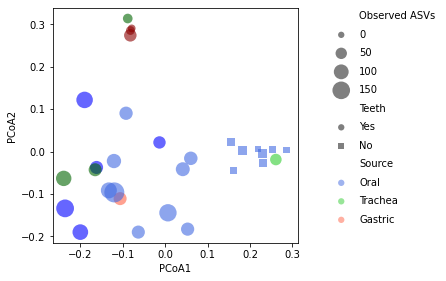

In [110]:
'''Create figure 1: categorical combined with '''

fig, ax1 = plt.subplots(1)

# create figure 1 with all the parameters
sns.scatterplot(data=figure1, x='Axis1_jit', y='Axis2_jit', 
                 hue='pat9_hue', size="observed_features", style='Teeth_cat', 
                 alpha=.6, edgecolor=None, x_jitter=True, y_jitter=True,
                 palette={'O':'royalblue', 'O-9':'blue', 'T': 'limegreen', 'T-9':'darkgreen', 'G':'tomato', 'G-9':'darkred'},
                 hue_order = ['O', 'O-9', 'T', 'T-9', 'G', 'G-9'],
                 sizes=(40, 400), linewidth=0,
                 markers=['o', 's'], legend=False, ax=ax1)


ax1.set_xlabel("PCoA1")
ax1.set_ylabel("PCoA2")
ax1.set_aspect(aspect=1)

#Customize legend with appropriate parameters of point size, shape, and color
legend_dict = {"Observed ASVs":(0, 'o', 'k'), '0':(40, 'o', 'k'), 50:(130, 'o', 'k'), 100:(220, 'o', 'k'), 150:(310, 'o', 'k'),
              "Teeth":(0, 'o', 'k'), "Yes":(40,'o', 'k'), "No":(40,'s', 'k'),
              "Source":(0, 'o', 'k'), 'Oral':(40, 'o', 'royalblue'), "Trachea":(40, 'o', 'limegreen'), "Gastric":(40, 'o', 'tomato')}
for leg in legend_dict:
    plt.scatter([], [], c=legend_dict[leg][2], alpha=0.5, s=legend_dict[leg][0],
                marker=legend_dict[leg][1], label=leg, linewidths=5, edgecolors='none')

plt.legend(scatterpoints=1, frameon=False, labelspacing=0.85, bbox_to_anchor=(1.6,1.025))


plt.tight_layout()
# plt.savefig("Figures/sns_output/figure1.svg",
#            quality=95, format='svg', transparent=False)



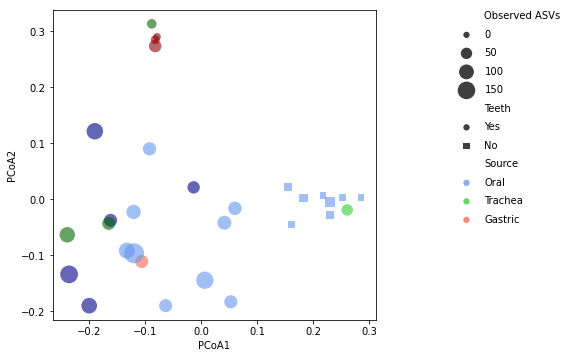

In [99]:
'''Create figure 1: categorical combined with '''

fig, ax1 = plt.subplots(1, figsize=(10,10))
#  gridspec_kw={'height_ratios':[2.5, 0.5]}, figsize=(14,10)

# fig = plt.figure(figsize=(6,5))

# create figure 1 with all the parameters
sns.scatterplot(data=figure1, x='Axis1_jit', y='Axis2_jit', 
                 hue='pat9_hue', size="observed_features", style='Teeth_cat', 
                 alpha=.6, edgecolor=None, x_jitter=True, y_jitter=True,
                 palette={'O':'cornflowerblue', 'O-9':'darkblue', 'T': 'limegreen', 'T-9':'darkgreen', 'G':'tomato', 'G-9':'darkred'},
                 hue_order = ['O', 'O-9', 'T', 'T-9', 'G', 'G-9'],
                 sizes=(40, 400), linewidth=0,
                 markers=['o', 's'], legend=False, ax=ax1)


ax1.set_xlabel("PCoA1")
ax1.set_ylabel("PCoA2")
ax1.set_aspect(aspect=1)

#Customize legend with appropriate parameters of point size, shape, and color
legend_dict = {"Observed ASVs":(0, 'o', 'k'), '0':(40, 'o', 'k'), 50:(130, 'o', 'k'), 100:(220, 'o', 'k'), 150:(310, 'o', 'k'),
              "Teeth":(0, 'o', 'k'), "Yes":(40,'o', 'k'), "No":(40,'s', 'k'),
              "Source":(0, 'o', 'k'), 'Oral':(40, 'o', 'cornflowerblue'), "Trachea":(40, 'o', 'limegreen'), "Gastric":(40, 'o', 'tomato')}
for leg in legend_dict:
    plt.scatter([], [], c=legend_dict[leg][2], alpha=0.75, s=legend_dict[leg][0],
                marker=legend_dict[leg][1], label=leg, linewidths=5, edgecolors='none')

plt.legend(scatterpoints=1, frameon=False, labelspacing=0.85, bbox_to_anchor=(1.6,1.025))


plt.tight_layout()
figure1.to_csv("Figures/dropbox_upload_10102020/data_files/fig1_pcoa_out.csv", index=False)
plt.savefig("Figures/sns_output/figure1_v2.svg",
           quality=95, format='svg', transparent=False)



In [6]:
figure1.columns

Index(['id', 'Axis 1', 'Axis 2', 'Axis 3', 'Axis 4', 'Axis 5', 'Axis 6',
       'Axis 7', 'Axis 8', 'Axis 9', 'Axis 10', 'Axis 11', 'Axis 12',
       'Axis 13', 'Axis 14', 'Axis 15', 'Axis 16', 'Axis 17', 'Axis 18',
       'Axis 19', 'Axis 20', 'Axis 21', 'Axis 22', 'Axis 23', 'Axis 24',
       'Axis 25', 'Axis 26', 'Axis 27', 'Axis 28', 'Axis 29', 'Axis 30',
       'observed_features', 'BarcodeSequence', 'LinkerPrimerSequence',
       'subjectID', 'Source', 'Day', 'DOB', 'DOEnrol', 'Age', 'Age_yrs',
       'Teeth', 'Spine_sx', 'Polys', 'AB', 'Description', 'Teeth_cat',
       'Day1_grt1', 'Teeth_cat_Day1_grt', 'pat9_hue', 'Axis1_jit',
       'Axis2_jit'],
      dtype='object')

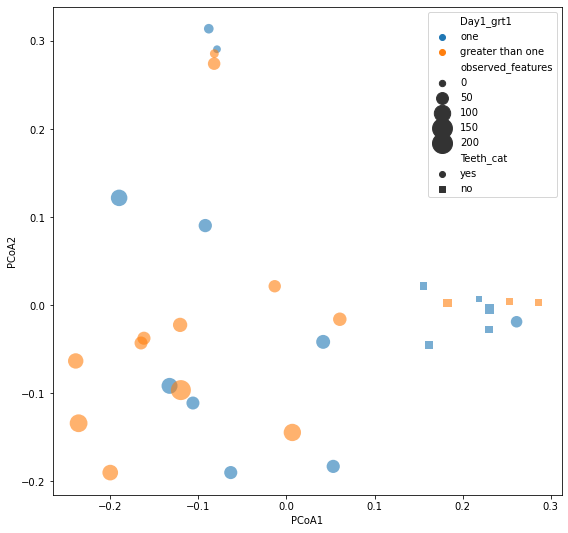

In [11]:
'''Create figure 1: categorical combined with '''

fig, ax1 = plt.subplots(1, figsize=(8,8))
#  gridspec_kw={'height_ratios':[2.5, 0.5]}, figsize=(14,10)

# fig = plt.figure(figsize=(6,5))

# create figure 1 with all the parameters
sns.scatterplot(data=figure1, x='Axis1_jit', y='Axis2_jit', 
                 hue='Day1_grt1', size="observed_features", style='Teeth_cat', 
                 alpha=.6, edgecolor=None, x_jitter=True, y_jitter=True,
                 sizes=(40, 400), linewidth=0,
                 markers=['o', 's'], ax=ax1)


ax1.set_xlabel("PCoA1")
ax1.set_ylabel("PCoA2")
ax1.set_aspect(aspect=1)


plt.tight_layout()
# figure1.to_csv("Figures/dropbox_upload_10102020/data_files/fig1_pcoa_out.csv", index=False)
plt.savefig("Figures/sns_output/figure1_day1_v1.svg",
           quality=95, format='svg', transparent=False)



In [81]:
'''export distance matrix stats'''

!qiime tools export \
   --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teeth_day_cat_pat9-significance.qzv \
   --output-path Figures/pub_stats/weighted_unifrac_distance_teeth_day_cat_pat9_signficance

!qiime tools export \
   --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat_pat9-significance.qzv \
   --output-path Figures/pub_stats/weighted_unifrac_distance_teethcat_pat9signficance

Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teeth_day_cat-significance


Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teeth_day_cat_pat9-significance.qzv as Visualization to directory Figures/pub_stats/weighted_unifrac_distance_teeth_day_cat_pat9_signficance
Exported DADA2_full/tree_outdir/diversity/core-metrics-visuals/weighted_unifrac_distance-teethcat_pat9-significance.qzv as Visualization to directory Figures/pub_stats/weighted_unifrac_distance_teethcat_pat9signficance


In [140]:
'''Get distance matrix pairwise comparisons'''

dist_mat_final = pd.read_table("Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teeth_day_cat-significance/raw_data.tsv")
dist_mat_final = dist_mat_final[['SubjectID1', 'SubjectID2', 'Group1', 'Group2', 'Distance']]

dist_mat_final_win_pat9 = pd.read_table("Figures/pub_stats/beta_diversity/weighted_unifrac_distance-teeth_day_cat_pat9-significance/raw_data.tsv")
dist_mat_final_win_pat9 = dist_mat_final_win_pat9[['SubjectID1', 'SubjectID2', 'Group1', 'Group2', 'Distance']]


within_no = dist_mat_final[(dist_mat_final['Group1']=='no-one') & (dist_mat_final['Group2']=='no-one')]
within_no['Label'] = 'Within No Teeth'

within_yes = dist_mat_final[(dist_mat_final['Group1']=='yes-one') & (dist_mat_final['Group2']=='yes-one')]
within_yes['Label'] = 'Within Teeth'


between_yes_no = dist_mat_final[(dist_mat_final['Group1']=='yes-one') & (dist_mat_final['Group2']=='no-one')]
between_yes_no['Label'] = 'No Teeth vs Teeth'

between_no_yes = dist_mat_final[(dist_mat_final['Group1']=='no-one') & (dist_mat_final['Group2']=='yes-one')]
between_no_yes['Label'] = 'No Teeth vs Teeth'


within_pat9 = dist_mat_final_win_pat9[(dist_mat_final_win_pat9['Group1']=='pat9') & (dist_mat_final_win_pat9['Group2']=='pat9')]
within_pat9['Label'] = 'Within Patient 9'

suppfig1a_plot = pd.concat([within_no, within_yes, between_yes_no, between_no_yes, within_pat9]).reset_index(drop=True)



/Users/manjotkaurnagyal/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/manjotkaurnagyal/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/manjotkaurnagyal/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying t

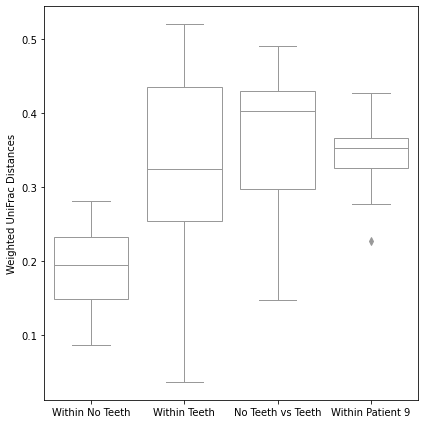

In [167]:
'''Create draft figure'''


fig = plt.figure(figsize=(6,6))


ax = sns.boxplot(data = suppfig1a_plot, x = 'Label', 
                 y = 'Distance', color='white', linewidth=1)


ax.set_xlabel("")
ax.set_ylabel("Weighted UniFrac Distances")


plt.tight_layout()

suppfig1a_plot.to_csv("Figures/dropbox_upload_10102020/data_files/suppfig1a_out.csv", index=False)

plt.savefig("Figures/sns_output/suppfigure1_v3.svg",
           quality=95, format='svg', transparent=False)


In [168]:
# get p-values for comparing the boxplots above using KW

from scipy import stats
import scikit_posthocs as sp


winteeth = suppfig1a_plot[suppfig1a_plot['Label']=='Within Teeth']
winnoteeth = suppfig1a_plot[suppfig1a_plot['Label']=='Within No Teeth']
btwteeth = suppfig1a_plot[suppfig1a_plot['Label']=='No Teeth vs Teeth']
winpat9 = suppfig1a_plot[suppfig1a_plot['Label']=='Within Patient 9']

print(stats.kruskal(winteeth['Distance'], winnoteeth['Distance'], btwteeth['Distance'], winpat9['Distance']))

# dunn_output = sp.posthoc_dunn(suppfig1a_plot, val_col='Distance', group_col='Label', p_adjust = 'bonferroni')

# dunn_output.to_csv("Figures/dropbox_upload_10102020/stats/suppfig1a_dunnstats.csv", index=False)


KruskalResult(statistic=22.339826659483023, pvalue=5.5427464570664344e-05)


#### Alpha diversity figures
Create supp figure 2 b/c

In [8]:
'''Get relevant stats for figure'''

# !qiime tools export \
#    --input-path DADA2_full/tree_outdir/diversity/core-metrics-visuals/observed_features_vector.qzv \
#    --output-path Figures/pub_stats/observed_features_significance


!qiime tools export \
   --input-path DADA2_full/tree_outdir/diversity/core-metrics-results/shannon_vector.qzv \
   --output-path Figures/pub_stats/shannon_signficance


Exported DADA2_full/tree_outdir/diversity/core-metrics-results/shannon_vector.qzv as Visualization to directory Figures/pub_stats/shannon_signficance


In [123]:
'''merge alpha diversity with appropriate files/md'''

!qiime metadata tabulate \
  --m-input-file DADA2_full/tree_outdir/diversity/core-metrics-results/shannon_vector.qza \
  --m-input-file DADA2_full/tree_outdir/diversity/core-metrics-results/observed_features_vector.qza \
  --m-input-file $METADATA_downstream_alpha \
  --o-visualization Figures/core-metrics-figures/alpha-div/shannon/shannon_observed_features-md.qzv


Saved Visualization to: Figures/core-metrics-figures/alpha-div/shannon/shannon_observed_features-md.qzv


In [19]:
'''Export observed features alpha diversity data'''

# updates the metadata.tsv
!qiime tools export \
   --input-path Figures/core-metrics-figures/alpha-div/shannon/shannon_observed_features-md.qzv \
   --output-path Figures/core-metrics-figures/alpha-div/shannon_observed_features



Exported Figures/core-metrics-figures/alpha-div/shannon/shannon_observed_features-md.qzv as Visualization to directory Figures/core-metrics-figures/alpha-div/shannon_observed_features


In [4]:
shannon_fig = pd.read_table('Figures/core-metrics-figures/alpha-div/shannon_observed_features/metadata.tsv')

# remove dtype row generated by qiime2
shannon_fig = shannon_fig.drop(index=0)


'''Convert to appropriate data types'''
# get a list of headers to convert to int type
md_sel_type = ['shannon_entropy', 'observed_features', 'subjectID', 'Day',
 'Age_yrs', 'Teeth', 'Spine_sx', 'Polys']
# get axis to float type dict and account for int types
shannon_dict = {ax:'float64' if ax in md_sel_type \
                else 'object' for ax in shannon_fig.columns }

# # convert axis to float type
shannon_fig = shannon_fig.astype(shannon_dict)

shannon_fig['pat9_hue'] = shannon_fig.apply(lambda row: row['Source']+'-'+str(int(row['subjectID']))\
             if row['subjectID']==9.0 else row['Source'], axis=1)

shannon_fig = shannon_fig[shannon_fig['Source']=='O']
# get df summary
shannon_fig.head()
shannon_fig.columns



Index(['id', 'shannon_entropy', 'observed_features', 'BarcodeSequence',
       'LinkerPrimerSequence', 'subjectID', 'Source', 'Day', 'DOB', 'DOEnrol',
       'Age', 'Age_yrs', 'Teeth', 'Spine_sx', 'Polys', 'AB', 'Description',
       'Teeth_cat', 'Day1_grt1', 'Teeth_cat_Day1_grt', 'AB_expl', 'pat9_hue'],
      dtype='object')

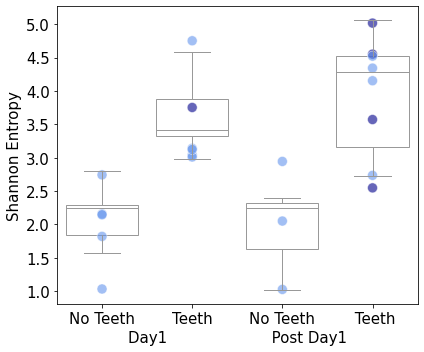

In [76]:
'''Plot alpha diversity boxplots'''

fig = plt.figure(figsize=(6,5))



order = {'no-one':1, 'yes-one':2, 'no-greater than one':3, 'yes-greater than one':4}

shannon_fig['order'] = shannon_fig['Teeth_cat_Day1_grt'].map(order)
shannon_fig = shannon_fig.sort_values(by=['order'])

# subset of oral samples only:

sns.boxplot(data=shannon_fig, x='Teeth_cat_Day1_grt', y='shannon_entropy', color='white', linewidth=1)

# Manually add jitter
def rand_jitter(arr):
    stdev = .075*(max(arr)-min(arr))
    np.random.seed(2)
    return arr + np.random.randn(len(arr)) * stdev



ax = sns.scatterplot(data=shannon_fig, x='Teeth_cat_Day1_grt', y=rand_jitter(shannon_fig['shannon_entropy']),
             hue='pat9_hue', palette={'O':'cornflowerblue', 'O-9':'darkblue', 'T': 'limegreen', 'T-9':'darkgreen', 'G':'tomato', 'G-9':'darkred'},
                 hue_order = ['O', 'O-9', 'T', 'T-9', 'G', 'G-9'], alpha=.6, legend=False, s=100)#, palette = colors

# legend_dict = {"Source":(0, 'o', 'k'), 'Oral':(40, 'o', 'royalblue'), "Trachea":(40, 'o', 'limegreen'), "Gastric":(40, 'o', 'tomato')}
# for leg in legend_dict:
#     plt.scatter([], [], c=legend_dict[leg][2], alpha=0.75, s=legend_dict[leg][0],
#                 label=leg, linewidths=5, edgecolors='none')

# plt.legend(scatterpoints=1, frameon=False, labelspacing=0.85, 
#            bbox_to_anchor=(1,1))




ax.set_ylabel('Shannon Entropy',fontsize=15);

ax.set_xlabel('Day1                      Post Day1',fontsize=15);

ax.set_xticks(range(4)) # <--- set the ticks first

# ax.set_ticklabels(ax.get_yticklabels(), fontsize=12)
plt.yticks(fontsize=15)
ax.set_xticklabels(['No Teeth' ,'Teeth',
                    'No Teeth',' Teeth'], fontsize=15)

plt.tight_layout()
plt.savefig("Figures/sns_output/shannon_figure2_v1.svg",
           quality=95, format='svg', transparent=False)




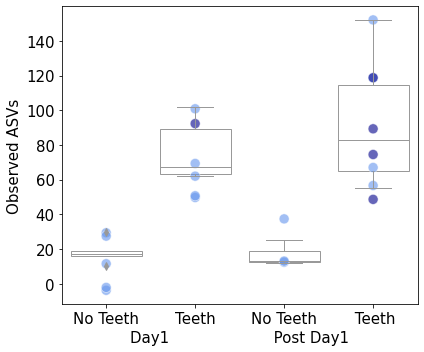

In [79]:
'''Plot alpha diversity boxplots'''

fig = plt.figure(figsize=(6,5))

# subset of oral samples only:

sns.boxplot(data=shannon_fig, x='Teeth_cat_Day1_grt', y='observed_features', color='white', linewidth=1)

# Manually add jitter
def rand_jitter(arr):
    stdev = .075*(max(arr)-min(arr))
    np.random.seed(2)
    return arr + np.random.randn(len(arr)) * stdev



ax = sns.scatterplot(data=shannon_fig, x='Teeth_cat_Day1_grt', y=rand_jitter(shannon_fig['observed_features']),
             hue='pat9_hue', palette={'O':'cornflowerblue', 'O-9':'darkblue', 'T': 'limegreen', 'T-9':'darkgreen', 'G':'tomato', 'G-9':'darkred'},
                 hue_order = ['O', 'O-9', 'T', 'T-9', 'G', 'G-9'], alpha=.6, legend=False, s=100)#, palette = colors

# legend_dict = {"Source":(0, 'o', 'k'), 'Oral':(40, 'o', 'royalblue'), "Trachea":(40, 'o', 'limegreen'), "Gastric":(40, 'o', 'tomato')}
# for leg in legend_dict:
#     plt.scatter([], [], c=legend_dict[leg][2], alpha=0.75, s=legend_dict[leg][0],
#                 label=leg, linewidths=5, edgecolors='none')

# plt.legend(scatterpoints=1, frameon=False, labelspacing=0.85, 
#            bbox_to_anchor=(1,1))




ax.set_ylabel('Observed ASVs',fontsize=15);

ax.set_xlabel('Day1                      Post Day1',fontsize=15);

ax.set_xticks(range(4)) # <--- set the ticks first

# ax.set_ticklabels(ax.get_yticklabels(), fontsize=12)
plt.yticks(fontsize=15)
ax.set_xticklabels(['No Teeth' ,'Teeth',
                    'No Teeth',' Teeth'], fontsize=15)

plt.tight_layout()
plt.savefig("Figures/sns_output/obsASV_suppfigure1b_v1.svg",
           quality=95, format='svg', transparent=False)


shannon_fig.to_csv("Figures/dropbox_upload_10102020/data_filesfig2_suppfig1b_alpha-div_out.csv", index=False)

